Covariance matrix :
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
Egen vectors :
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
Egen values:
 [2.93808505 0.9201649  0.14774182 0.02085386]
Cummulative Variance Explained [ 72.96244541  95.8132072   99.48212909 100.        ]


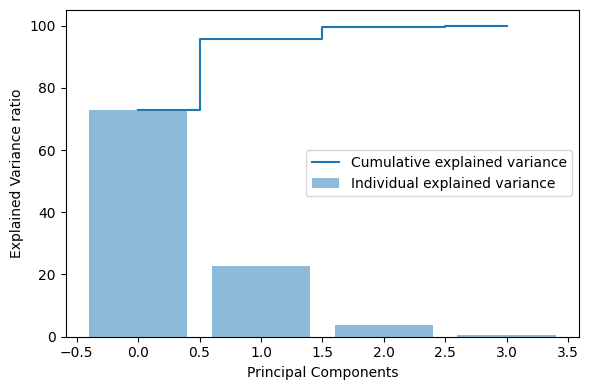

In [7]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt

iris=datasets.load_iris()
X=iris.data

X_std=StandardScaler().fit_transform(X)

cov_mat=np.cov(X_std.T)

print('Covariance matrix :\n',cov_mat)

eig_vals,eig_vecs=np.linalg.eig(cov_mat)
print('Egen vectors :\n',eig_vecs)
print('Egen values:\n',eig_vals)

eig_pairs=[(np.abs(eig_vals[i]),eig_vecs[:,i])for i in range(len (eig_vals))]

tot=sum(eig_vals)
var_exp=[(i/tot)*100 for i in sorted (eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print("Cummulative Variance Explained",cum_var_exp)

plt.figure(figsize=(6,4))

plt.bar(range(4),var_exp,alpha=0.5,align='center',label='Individual explained variance')
plt.step(range(4),cum_var_exp,where='mid',label='Cumulative explained variance')

plt.ylabel('Explained Variance ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

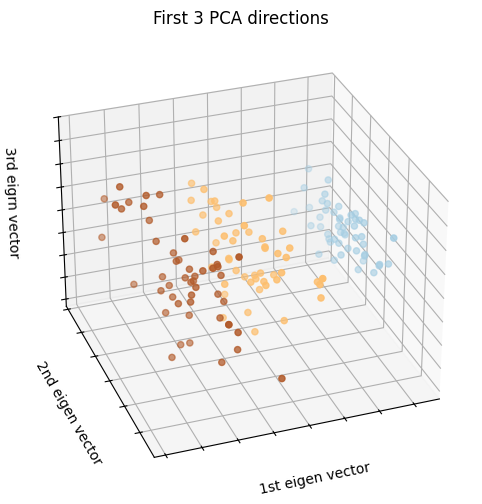

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

iris=datasets.load_iris()
Y=iris.target


fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)


X_reduced=PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2],c=Y,cmap=plt.cm.Paired)
ax.set_title("First 3 PCA directions")
ax.set_xlabel("1st eigen vector")
ax.set_xticklabels([])
ax.set_ylabel("2nd eigen vector")
ax.set_yticklabels([])
ax.set_zlabel("3rd eigen vector")
ax.set_zticklabels([])
plt.show()